In [1]:
# imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
# local
import acquire as a
import t_prepare as p
import modeling as m

# Wine Quality

In [2]:
df = a.get_wine()
# no nulls
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  red  
0         9.4        5    1  
1         9.8        5    1  
2         9.8        5    1  
3         9.8        6    1  
4         9.4        5    1  
...       ...      ...  ...  
6492     11.2        6    0  
6493      9.6        5    0  
6494      9.4        6    0  
6495     12.8        7    0  
6496     11.8        6    0  

[6497 rows x 13 columns]

## Prep

In [3]:
# for col in df.columns:
#     df = df.rename(columns={col: col.replace(' ','_')})
# df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
red                   6497.0    0.246114   0.430779  0.00000   0.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
red                     0.00000    0.00000    1.00000

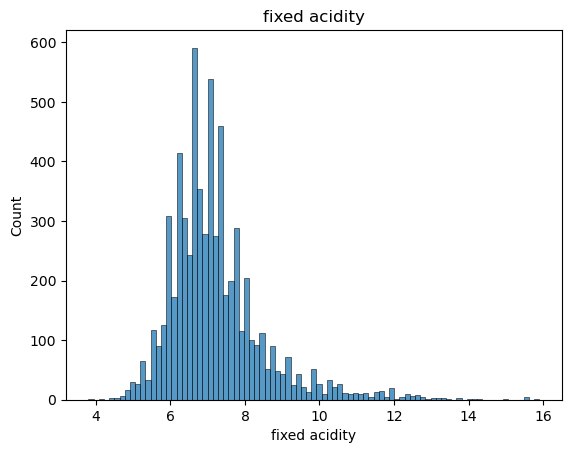

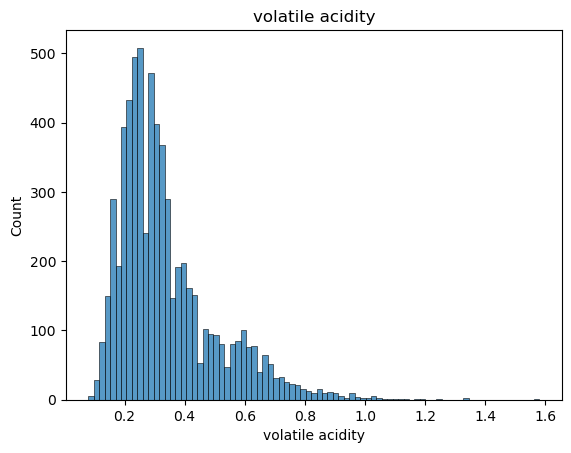

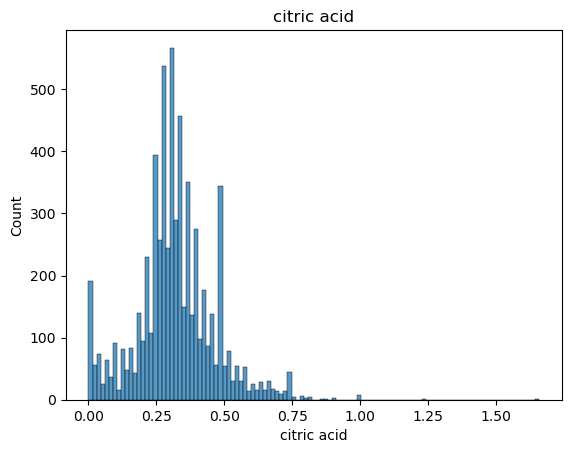

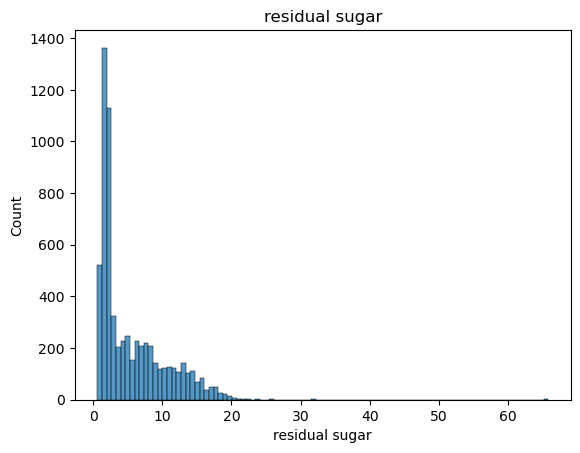

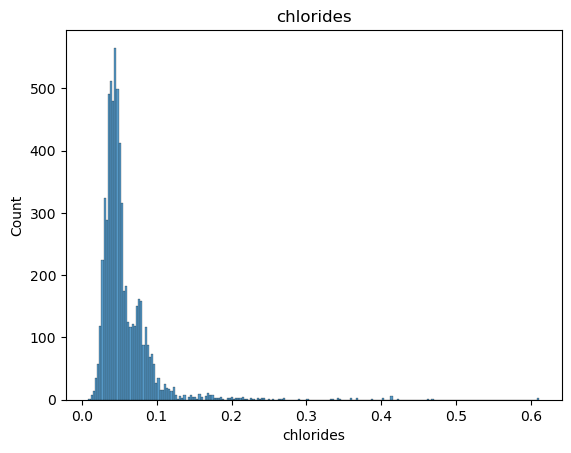

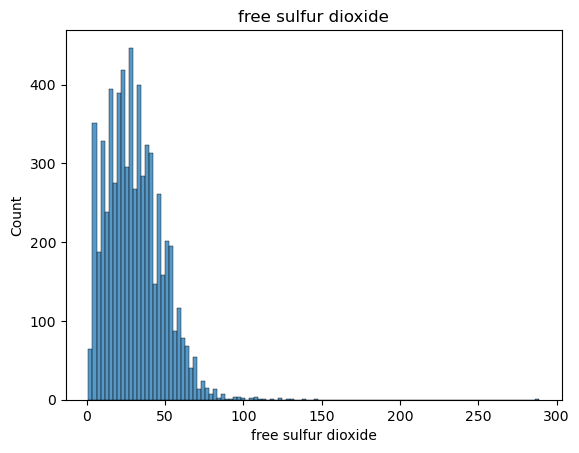

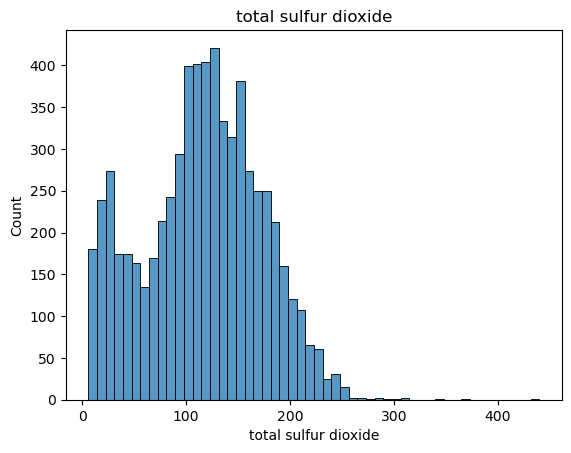

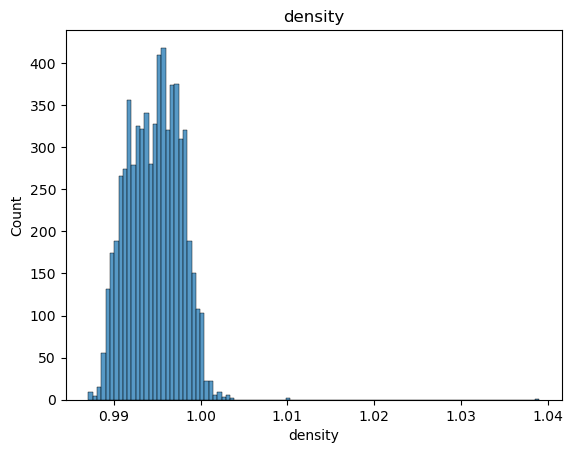

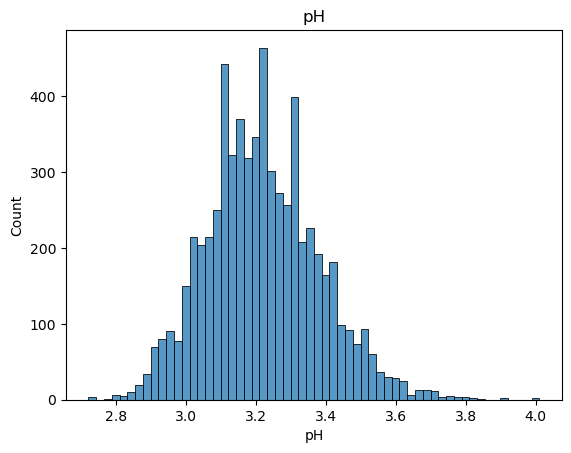

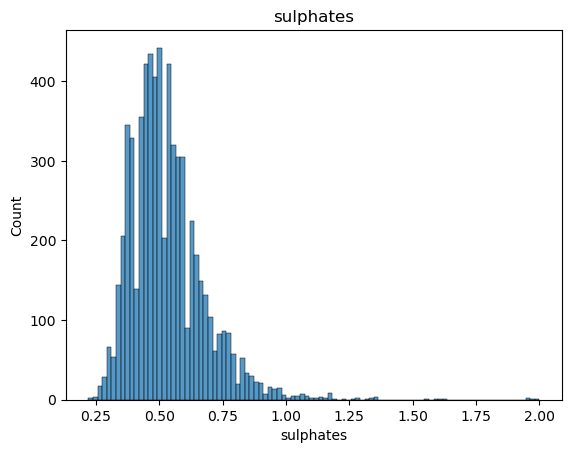

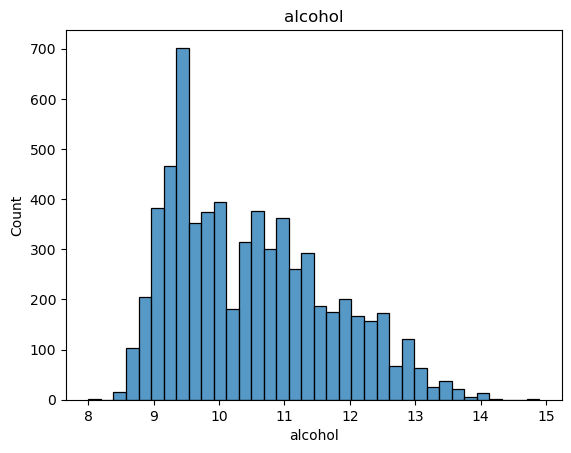

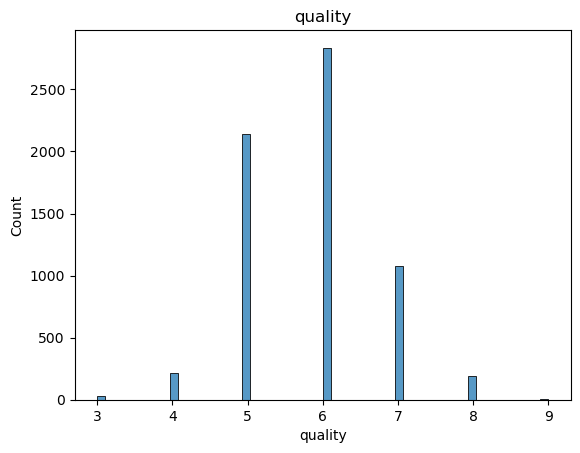

In [6]:
for col in df.columns[:-1]:
    sns.histplot(data=df,x=col)
    plt.title(col)
    plt.show()

In [7]:
# explore on white wine
dfw = df[df.wine_type=='white']
dfw

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1599            7.0              0.27         0.36            20.7      0.045   
1600            6.3              0.30         0.34             1.6      0.049   
1601            8.1              0.28         0.40             6.9      0.050   
1602            7.2              0.23         0.32             8.5      0.058   
1603            7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1599                 45.0                 170.0  1.00100  3.00       0.45   
1600                 14.0                 132.0  0.99400  3.30       0.49   
1601                 30.0                  97.0  0.99510  3.26       0.44   
1602                 47.0                 186.0  0.99560  3.19       0.40   
1603                 47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  red  
1599      8.8        6    0  
1600      9.5        6    0  
1601     10.1        6    0  
1602      9.9        6    0  
1603      9.9        6    0  
...       ...      ...  ...  
6492     11.2        6    0  
6493      9.6        5    0  
6494      9.4        6    0  
6495     12.8        7    0  
6496     11.8        6    0  

[4898 rows x 13 columns]

In [8]:
def rename_col(df):
    # get rid of spaces in column names
    for col in df.columns:
        df = df.rename(columns={col: col.replace(' ','_')})
    return df

def wine_out_w(dfw):
    # Drop column: 'red'
    dfw = dfw.drop(columns=['wine_type'])
    # Filter rows based on column: 'chlorides'
    dfw = dfw[dfw['chlorides'] < .125]
    # Filter rows based on column: 'fixed_acidity'
    dfw = dfw[dfw['fixed_acidity'] < 10.8]
    # Filter rows based on column: 'citric_acid'
    dfw = dfw[dfw['citric_acid'] < 1]
    # Filter rows based on column: 'free_sulfur_dioxide'
    dfw = dfw[dfw['free_sulfur_dioxide'] < 280]
    # Filter rows based on column: 'residual_sugar'
    return dfw[dfw['residual_sugar'] < 25]

def add_feature(df):
    # Derive column 'bound_sulfur_dioxide' from column: 'free_sulfur_dioxide'
    df.insert(6, 'bound_sulfur_dioxide', df.apply(lambda row : (row['total_sulfur_dioxide']-row['free_sulfur_dioxide']), axis=1))
    # create bool column on sweet or not
    # df.insert(4, 'sweet', df.apply(lambda row : (row['residual_sugar'] > 35), axis=1)) # only one sweet wine so not useful
    return df

In [9]:
df = a.get_wine()
dfw = df[df.wine_type=='white']
dfw = rename_col(dfw)
dfw = wine_out_w(dfw)
dfw = add_feature(dfw)
dfw

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1599            7.0              0.27         0.36            20.7      0.045   
1600            6.3              0.30         0.34             1.6      0.049   
1601            8.1              0.28         0.40             6.9      0.050   
1602            7.2              0.23         0.32             8.5      0.058   
1603            7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  bound_sulfur_dioxide  total_sulfur_dioxide  \
1599                 45.0                 125.0                 170.0   
1600                 14.0                 118.0                 132.0   
1601                 30.0                  67.0                  97.0   
1602                 47.0                 139.0                 186.0   
1603                 47.0                 139.0                 186.0   
...                   ...                   ...                   ...   
6492                 24.0                  68.0                  92.0   
6493                 57.0                 111.0                 168.0   
6494                 30.0                  81.0                 111.0   
6495                 20.0                  90.0                 110.0   
6496                 22.0                  76.0                  98.0   

      density    pH  sulphates  alcohol  quality  
1599  1.00100  3.00       0.45      8.8        6  
1600  0.99400  3.30       0.49      9.5        6  
1601  0.99510  3.26       0.44     10.1        6  
1602  0.99560  3.19       0.40      9.9        6  
1603  0.99560  3.19       0.40      9.9        6  
...       ...   ...        ...      ...      ...  
6492  0.99114  3.27       0.50     11.2        6  
6493  0.99490  3.15       0.46      9.6        5  
6494  0.99254  2.99       0.46      9.4        6  
6495  0.98869  3.34       0.38     12.8        7  
6496  0.98941  3.26       0.32     11.8        6  

[4800 rows x 13 columns]

## Explore White Wine

In [10]:
df = a.get_wine()
df = p.prep_w_wine(df)
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  bound_sulfur_dioxide  total_sulfur_dioxide  \
0                    11.0                  23.0                  34.0   
1                    25.0                  42.0                  67.0   
2                    15.0                  39.0                  54.0   
3                    17.0                  43.0                  60.0   
4                    11.0                  23.0                  34.0   
...                   ...                   ...                   ...   
6492                 24.0                  68.0                  92.0   
6493                 57.0                 111.0                 168.0   
6494                 30.0                  81.0                 111.0   
6495                 20.0                  90.0                 110.0   
6496                 22.0                  76.0                  98.0   

      density    pH  sulphates  alcohol  quality  
0     0.99780  3.51       0.56      9.4        5  
1     0.99680  3.20       0.68      9.8        5  
2     0.99700  3.26       0.65      9.8        5  
3     0.99800  3.16       0.58      9.8        6  
4     0.99780  3.51       0.56      9.4        5  
...       ...   ...        ...      ...      ...  
6492  0.99114  3.27       0.50     11.2        6  
6493  0.99490  3.15       0.46      9.6        5  
6494  0.99254  2.99       0.46      9.4        6  
6495  0.98869  3.34       0.38     12.8        7  
6496  0.98941  3.26       0.32     11.8        6  

[6445 rows x 13 columns]

In [11]:
train,val,test = p.split_data(df)
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4327            6.5              0.35         0.28           12.40      0.051   
3599            6.8              0.31         0.09            1.40      0.040   
3081            6.7              0.16         0.49            2.40      0.046   
1945            5.6              0.34         0.10            1.30      0.031   
3648            6.3              0.28         0.24            8.45      0.031   
...             ...               ...          ...             ...        ...   
5816            6.1              0.38         0.14            3.90      0.060   
6258            6.6              0.25         0.25            1.30      0.040   
1512            6.4              0.79         0.04            2.20      0.061   
499             8.7              0.69         0.31            3.00      0.086   
5015            7.2              0.37         0.40           11.60      0.032   

      free_sulfur_dioxide  bound_sulfur_dioxide  total_sulfur_dioxide  \
4327                 86.0                 127.0                 213.0   
3599                 56.0                  89.0                 145.0   
3081                 57.0                 130.0                 187.0   
1945                 20.0                  48.0                  68.0   
3648                 32.0                 140.0                 172.0   
...                   ...                   ...                   ...   
5816                 27.0                  86.0                 113.0   
6258                 28.0                  57.0                  85.0   
1512                 11.0                   6.0                  17.0   
499                  23.0                  58.0                  81.0   
5015                 34.0                 180.0                 214.0   

      density    pH  sulphates  alcohol  quality  
4327  0.99620  3.16       0.51      9.9        6  
3599  0.99220  3.19       0.46     10.0        5  
3081  0.99520  3.62       0.81     10.4        6  
1945  0.99060  3.36       0.51     11.2        7  
3648  0.99580  3.39       0.57      9.7        7  
...       ...   ...        ...      ...      ...  
5816  0.99344  3.07       0.34      9.2        4  
6258  0.98984  2.87       0.48     11.2        6  
1512  0.99588  3.53       0.65     10.4        6  
499   1.00020  3.48       0.74     11.6        6  
5015  0.99630  3.10       0.51      9.8        6  

[3867 rows x 13 columns]

In [12]:
train['qual'] = train.quality.astype(str)

In [13]:
# sns.pairplot(data=train,hue='qual')
# plt.show()

In [14]:
# whi quality corr: alcohol, dens, chl, bound, vol_acid, total, fixed, ph, sugar, sul, free, citric
# train.corr()['quality'].sort_values(ascending = False).plot(kind='bar')

In [15]:
# plt.figure(figsize=[10,6])
# exam_corr = train.corr(method='spearman')
# sns.heatmap(exam_corr, cmap='PRGn', annot=True)
# plt.show()

In [16]:
Xtr,Xv,Xt = train.drop(columns=['quality','qual']),val.drop(columns=['quality']),test.drop(columns=['quality'])
Xtr_s,Xv_s,Xt_s = p.std(Xtr,Xv,Xt)
ytr,yv,yt = train.quality,val.quality,test.quality
Xtr_s.sample(1)

fixed_acidity_s  volatile_acidity_s  citric_acid_s  residual_sugar_s  \
1513        -0.614311            1.375363       -1.16233         -0.777346   

      chlorides_s  free_sulfur_dioxide_s  bound_sulfur_dioxide_s  \
1513      0.96843              -0.777101               -0.833454   

      total_sulfur_dioxide_s  density_s      pH_s  sulphates_s  alcohol_s  
1513               -0.910406  -0.569657  0.708652     0.493795   -0.00355

In [17]:
# for r in [2,3]:
#     for feature in itertools.combinations(Xtr_s.columns,r):
#         f = list(feature)
#         pd.Series({k:KMeans(k,random_state=42).fit(Xtr_s[f]).inertia_ for k in range(2,16)}).plot(marker='x')
#         plt.xticks(range(2,16))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title(f)
#         plt.show()

In [18]:
def cluck2(df_s,df_t,f,clusters):
    X = df_s[f]
    km = KMeans(n_clusters=clusters,random_state=42)
    km.fit(X)
    df_t[f'cluster_{f[0][0]}{f[1][0]}{clusters}'] = km.predict(X)
    df_t.quality = df_t.quality.astype(str)
    df_t[f'cluster_{f[0][0]}{f[1][0]}{clusters}'] = df_t[f'cluster_{f[0][0]}{f[1][0]}{clusters}'].astype(str)
    plt.figure(figsize=[16,4])
    plt.subplot(121)
    sns.scatterplot(data=df_t, x=f[0][:-2], y=f[1][:-2], alpha=.6, hue='quality')
    plt.subplot(122)
    sns.scatterplot(data=df_t, x=f[0][:-2], y=f[1][:-2], alpha=.6, hue=f'cluster_{f[0][0]}{f[1][0]}{clusters}')
    plt.show()

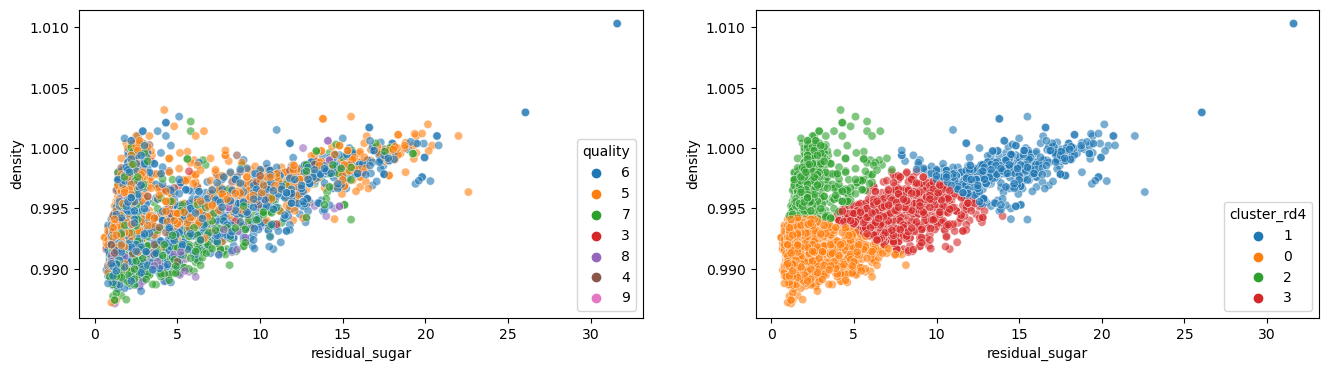

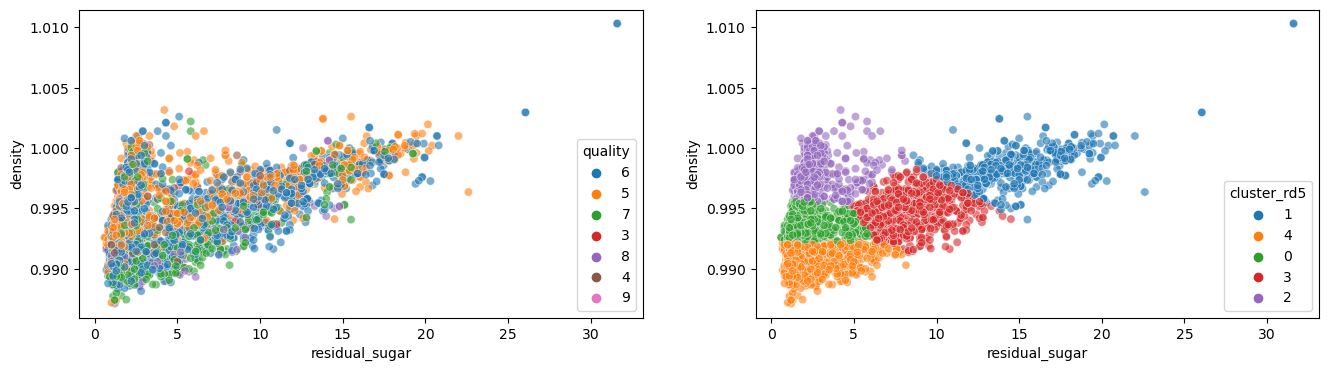

In [19]:
# sugar, dense 4 n 5
cluck2(Xtr_s,train,['residual_sugar_s','density_s'],4)
cluck2(Xtr_s,train,['residual_sugar_s','density_s'],5)

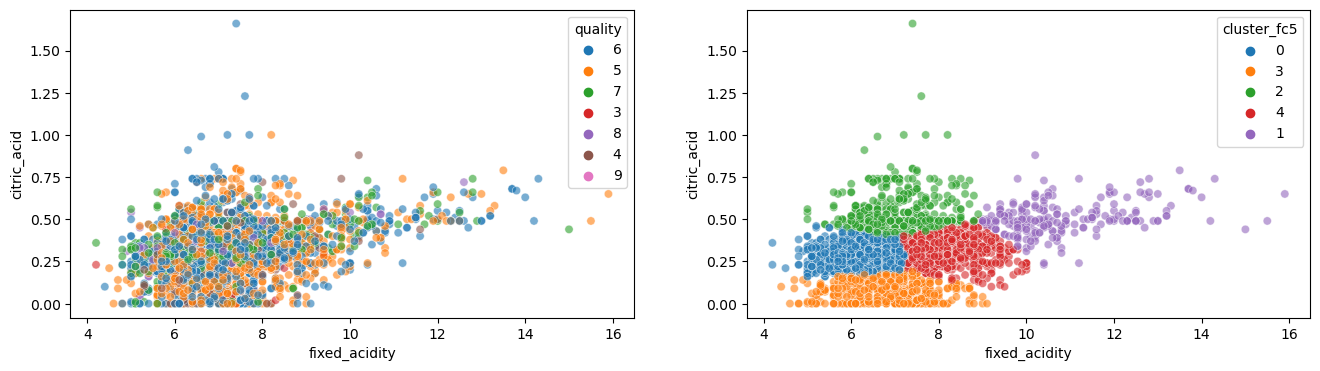

In [20]:
# fixed citric 5
cluck2(Xtr_s,train,['fixed_acidity_s','citric_acid_s'],5)

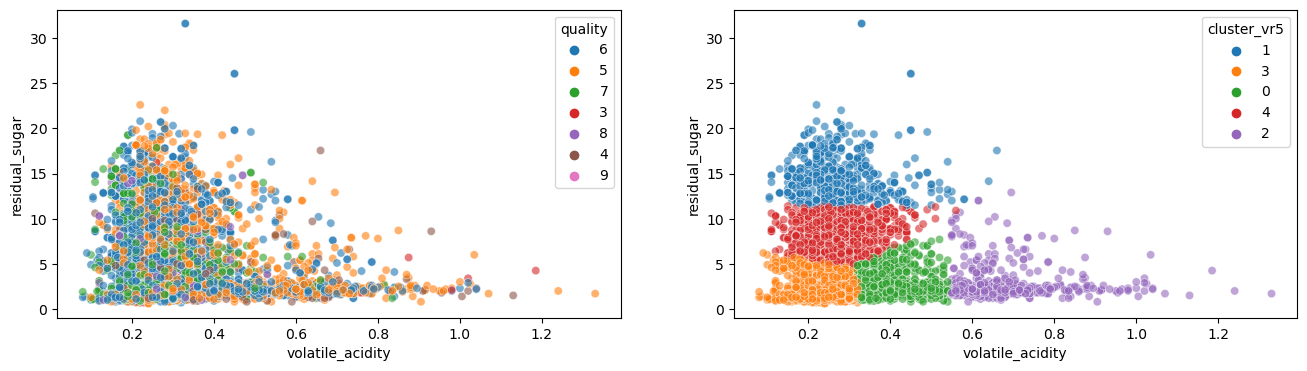

In [21]:
# vol sug 5
cluck2(Xtr_s,train,['volatile_acidity_s','residual_sugar_s'],5)

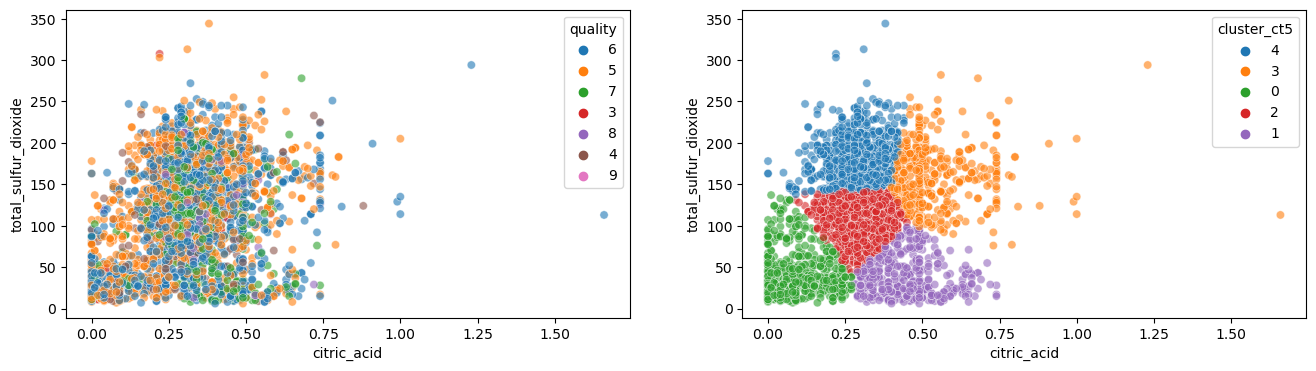

In [22]:
# cit tot 5
cluck2(Xtr_s,train,['citric_acid_s','total_sulfur_dioxide_s'],5)

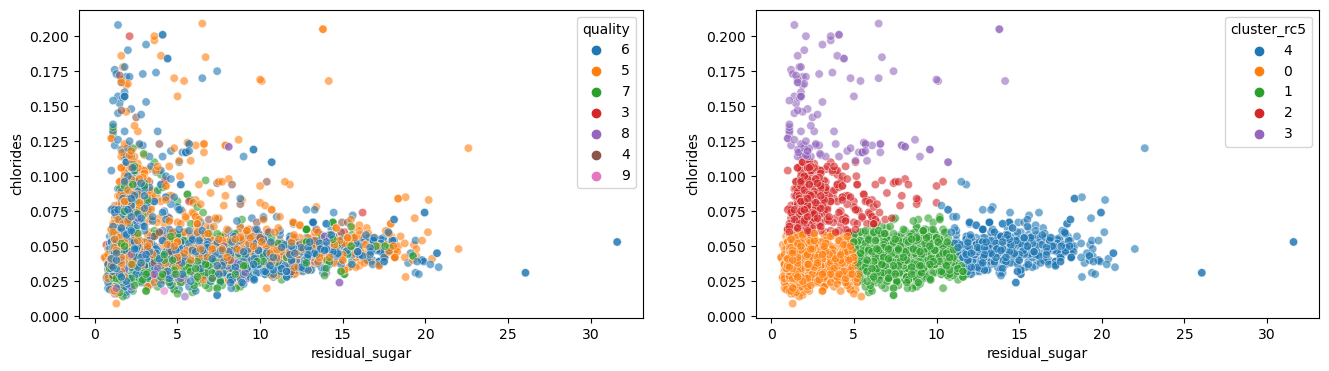

In [23]:
# sug chl 5
cluck2(Xtr_s,train,['residual_sugar_s','chlorides_s'],5)

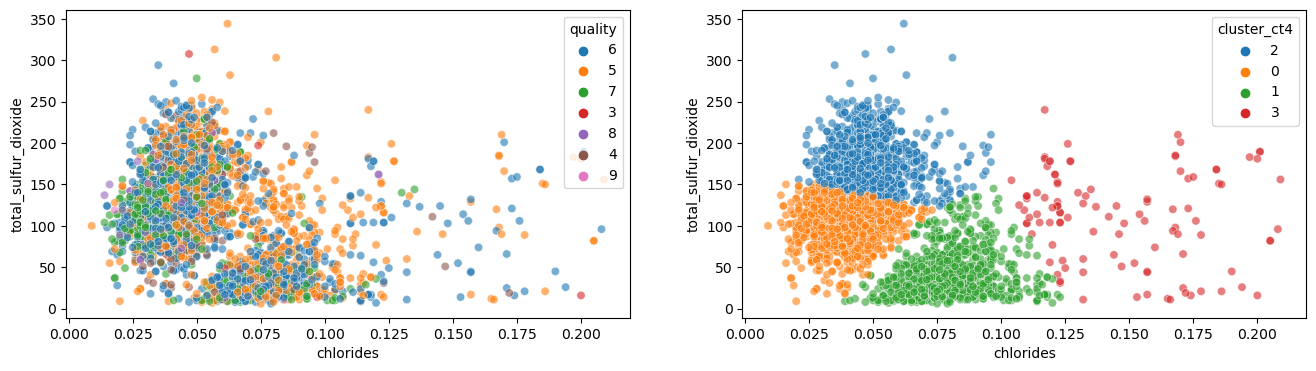

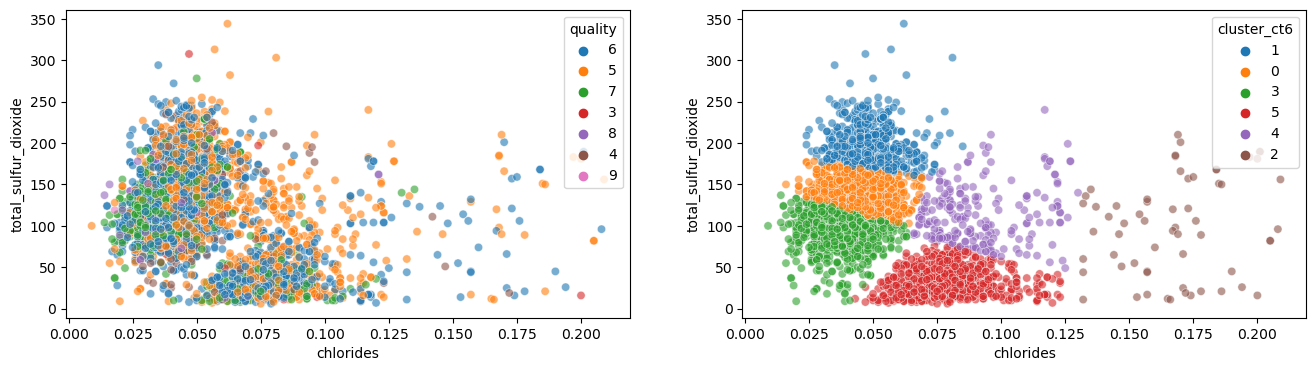

In [24]:
# chl tot 46
cluck2(Xtr_s,train,['chlorides_s','total_sulfur_dioxide_s'],4)
cluck2(Xtr_s,train,['chlorides_s','total_sulfur_dioxide_s'],6)

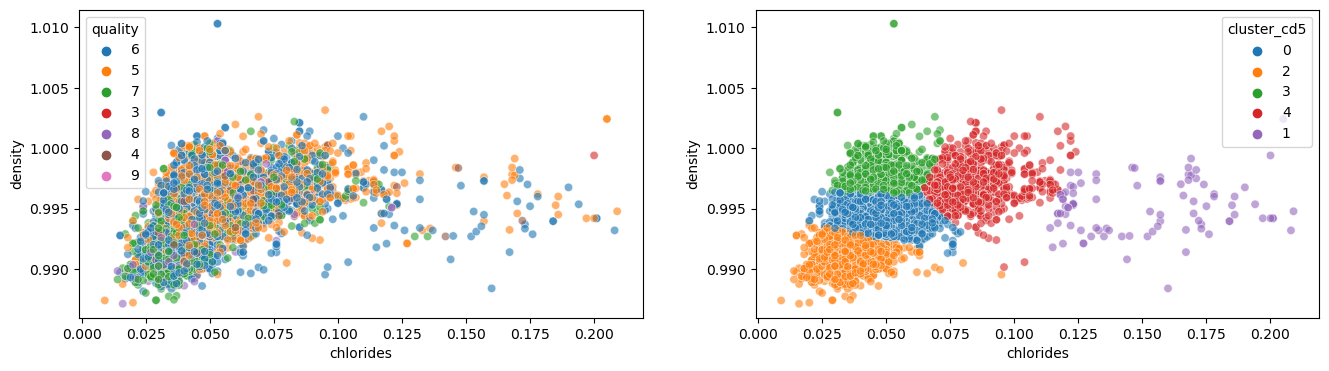

In [25]:
# chl den 5
cluck2(Xtr_s,train,['chlorides_s','density_s'],5)

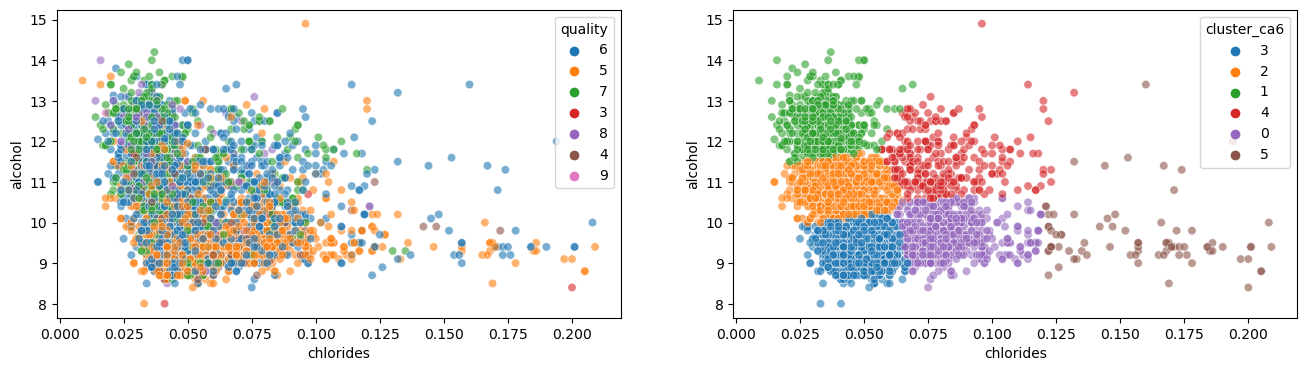

In [26]:
# chl alc 6
cluck2(Xtr_s,train,['chlorides_s','alcohol_s'],6)

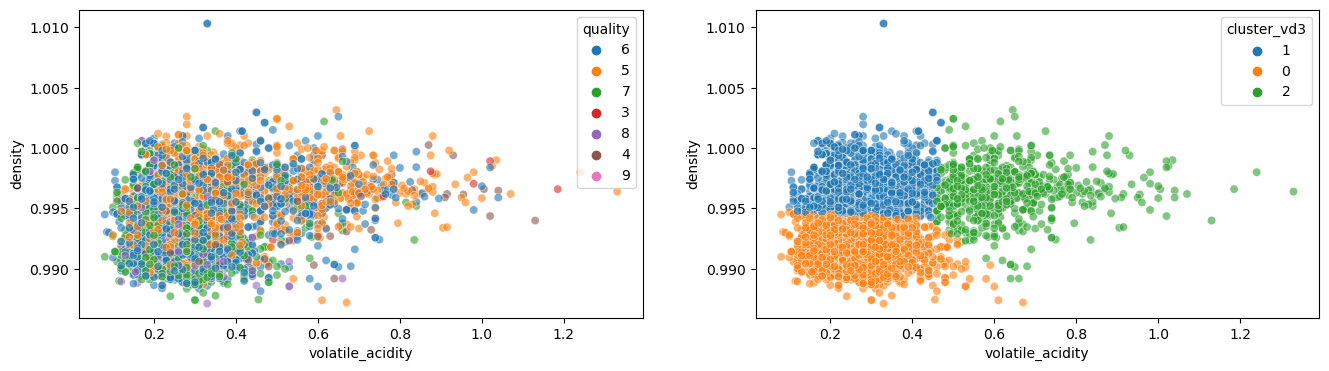

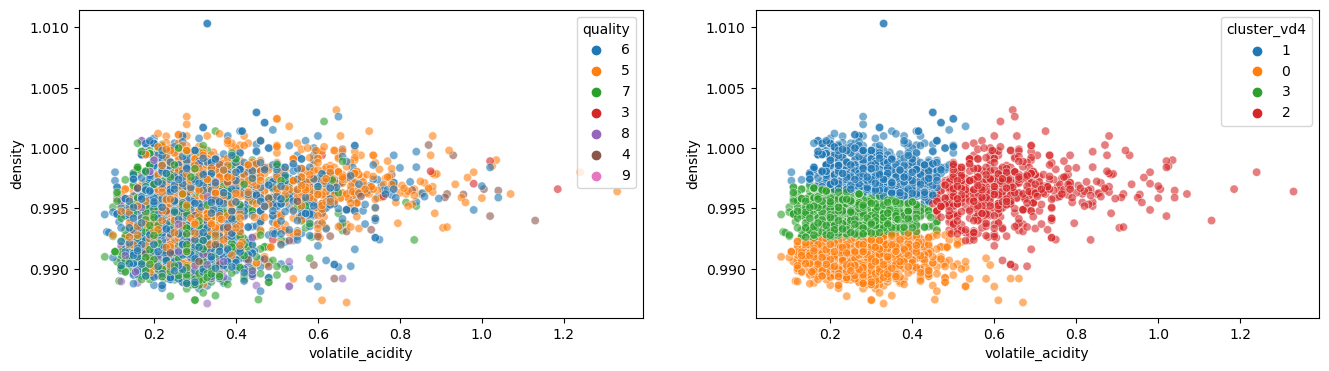

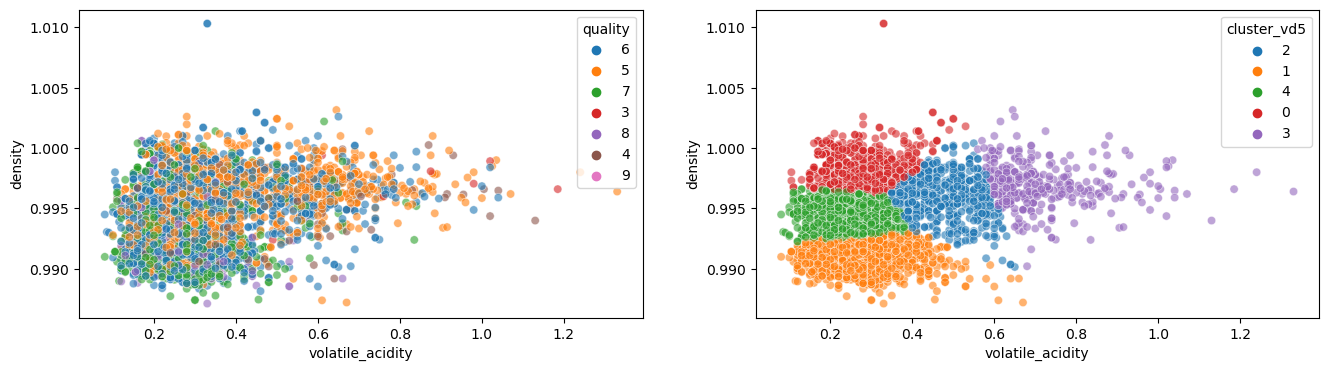

In [27]:
# total dense 345
cluck2(Xtr_s,train,['volatile_acidity_s','density_s'],3)
cluck2(Xtr_s,train,['volatile_acidity_s','density_s'],4)
cluck2(Xtr_s,train,['volatile_acidity_s','density_s'],5)

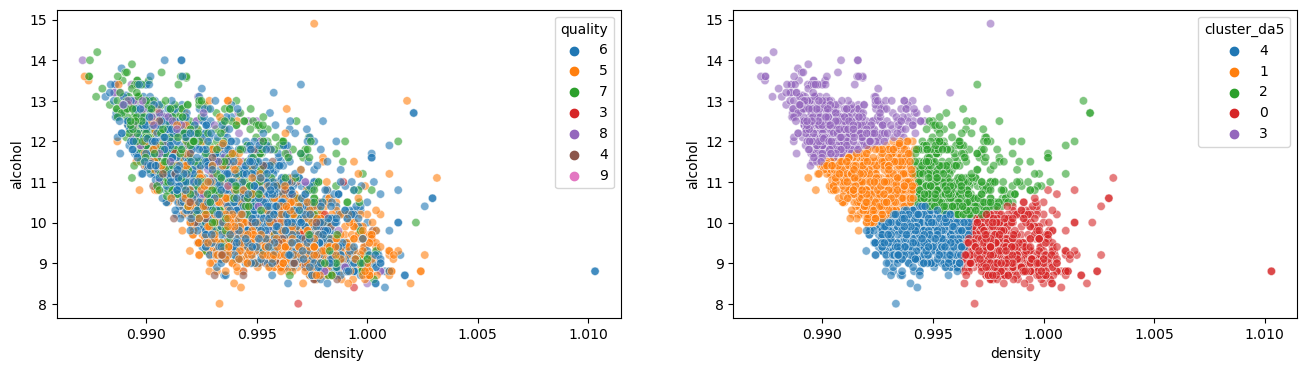

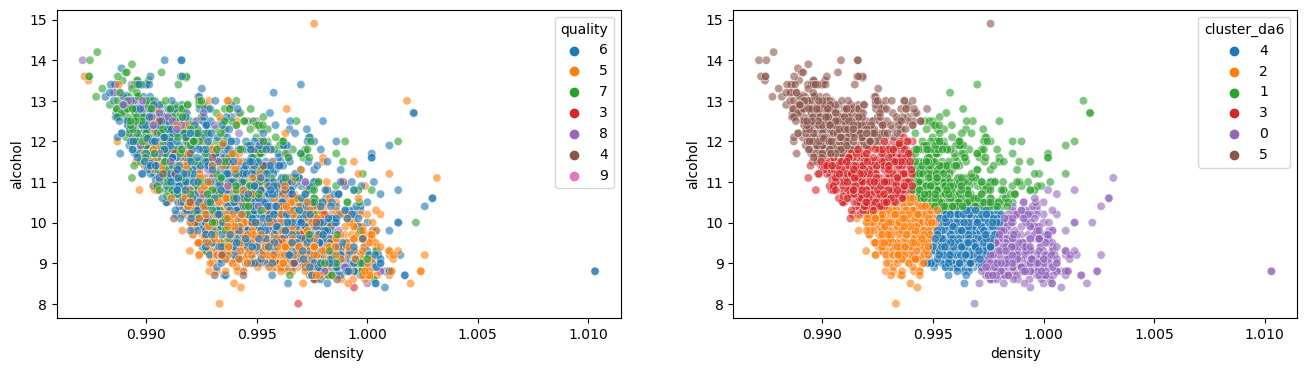

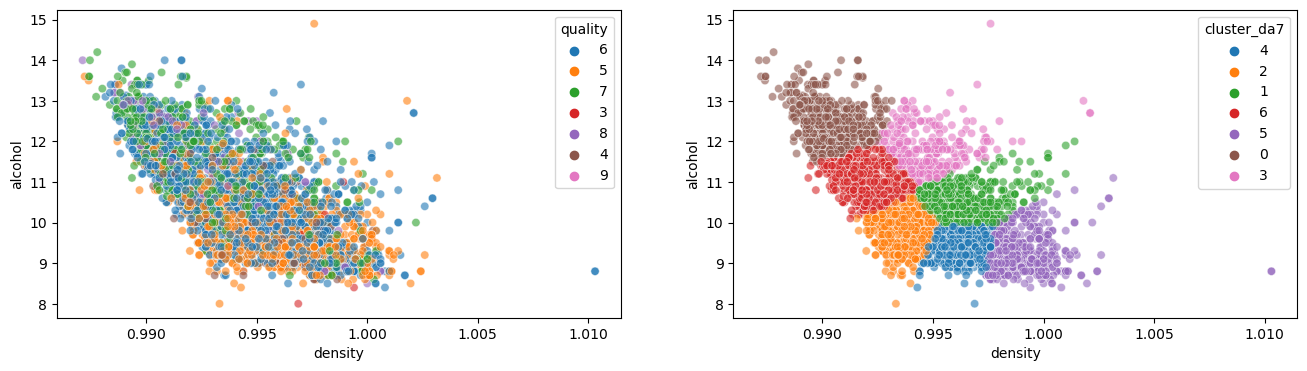

In [28]:
# dense alc 567
cluck2(Xtr_s,train,['density_s','alcohol_s'],5)
cluck2(Xtr_s,train,['density_s','alcohol_s'],6)
cluck2(Xtr_s,train,['density_s','alcohol_s'],7)

In [29]:
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4327            6.5              0.35         0.28           12.40      0.051   
3599            6.8              0.31         0.09            1.40      0.040   
3081            6.7              0.16         0.49            2.40      0.046   
1945            5.6              0.34         0.10            1.30      0.031   
3648            6.3              0.28         0.24            8.45      0.031   
...             ...               ...          ...             ...        ...   
5816            6.1              0.38         0.14            3.90      0.060   
6258            6.6              0.25         0.25            1.30      0.040   
1512            6.4              0.79         0.04            2.20      0.061   
499             8.7              0.69         0.31            3.00      0.086   
5015            7.2              0.37         0.40           11.60      0.032   

      free_sulfur_dioxide  bound_sulfur_dioxide  total_sulfur_dioxide  \
4327                 86.0                 127.0                 213.0   
3599                 56.0                  89.0                 145.0   
3081                 57.0                 130.0                 187.0   
1945                 20.0                  48.0                  68.0   
3648                 32.0                 140.0                 172.0   
...                   ...                   ...                   ...   
5816                 27.0                  86.0                 113.0   
6258                 28.0                  57.0                  85.0   
1512                 11.0                   6.0                  17.0   
499                  23.0                  58.0                  81.0   
5015                 34.0                 180.0                 214.0   

      density    pH  ...  cluster_ct4  cluster_ct6 cluster_cd5 cluster_ca6  \
4327  0.99620  3.16  ...            2            1           0           3   
3599  0.99220  3.19  ...            2            0           2           3   
3081  0.99520  3.62  ...            2            1           0           2   
1945  0.99060  3.36  ...            0            3           2           2   
3648  0.99580  3.39  ...            2            0           0           3   
...       ...   ...  ...          ...          ...         ...         ...   
5816  0.99344  3.07  ...            0            0           0           3   
6258  0.98984  2.87  ...            0            3           2           2   
1512  0.99588  3.53  ...            1            5           0           2   
499   1.00020  3.48  ...            1            4           4           4   
5015  0.99630  3.10  ...            2            1           0           3   

     cluster_vd3 cluster_vd4 cluster_vd5 cluster_da5 cluster_da6 cluster_da7  
4327           1           1           2           4           4           4  
3599           0           0           1           1           2           2  
3081           1           3           4           2           1           1  
1945           0           0           1           1           3           6  
3648           1           3           4           4           4           4  
...          ...         ...         ...         ...         ...         ...  
5816           0           3           4           4           2           2  
6258           0           0           1           1           3           6  
1512           2           2           3           2           1           1  
499            2           2           3           2           1           1  
5015           1           1           2           4           4           4  

[3867 rows x 30 columns]

In [30]:
train.cluster_da5 = train.cluster_da5.map({'0':'hi_den_lo_alc','1':'lo_den_med_alc','2':'med_den_med_alc','3':'lo_den_hi_alc','4':'med_den_lo_alc'})
train = train.rename(columns={'cluster_da5':'alc_density'}).drop(columns=['cluster_da6','cluster_da7'])
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4327            6.5              0.35         0.28           12.40      0.051   
3599            6.8              0.31         0.09            1.40      0.040   
3081            6.7              0.16         0.49            2.40      0.046   
1945            5.6              0.34         0.10            1.30      0.031   
3648            6.3              0.28         0.24            8.45      0.031   
...             ...               ...          ...             ...        ...   
5816            6.1              0.38         0.14            3.90      0.060   
6258            6.6              0.25         0.25            1.30      0.040   
1512            6.4              0.79         0.04            2.20      0.061   
499             8.7              0.69         0.31            3.00      0.086   
5015            7.2              0.37         0.40           11.60      0.032   

      free_sulfur_dioxide  bound_sulfur_dioxide  total_sulfur_dioxide  \
4327                 86.0                 127.0                 213.0   
3599                 56.0                  89.0                 145.0   
3081                 57.0                 130.0                 187.0   
1945                 20.0                  48.0                  68.0   
3648                 32.0                 140.0                 172.0   
...                   ...                   ...                   ...   
5816                 27.0                  86.0                 113.0   
6258                 28.0                  57.0                  85.0   
1512                 11.0                   6.0                  17.0   
499                  23.0                  58.0                  81.0   
5015                 34.0                 180.0                 214.0   

      density    pH  ...  cluster_ct5  cluster_rc5 cluster_ct4 cluster_ct6  \
4327  0.99620  3.16  ...            4            4           2           1   
3599  0.99220  3.19  ...            4            0           2           0   
3081  0.99520  3.62  ...            3            0           2           1   
1945  0.99060  3.36  ...            0            0           0           3   
3648  0.99580  3.39  ...            4            1           2           0   
...       ...   ...  ...          ...          ...         ...         ...   
5816  0.99344  3.07  ...            2            2           0           0   
6258  0.98984  2.87  ...            2            0           0           3   
1512  0.99588  3.53  ...            0            2           1           5   
499   1.00020  3.48  ...            2            2           1           4   
5015  0.99630  3.10  ...            4            1           2           1   

     cluster_cd5 cluster_ca6 cluster_vd3 cluster_vd4 cluster_vd5  \
4327           0           3           1           1           2   
3599           2           3           0           0           1   
3081           0           2           1           3           4   
1945           2           2           0           0           1   
3648           0           3           1           3           4   
...          ...         ...         ...         ...         ...   
5816           0           3           0           3           4   
6258           2           2           0           0           1   
1512           0           2           2           2           3   
499            4           4           2           2           3   
5015           0           3           1           1           2   

          alc_density  
4327   med_den_lo_alc  
3599   lo_den_med_alc  
3081  med_den_med_alc  
1945   lo_den_med_alc  
3648   med_den_lo_alc  
...               ...  
5816   med_den_lo_alc  
6258   lo_den_med_alc  
1512  med_den_med_alc  
499   med_den_med_alc  
5015   med_den_lo_alc  

[3867 rows x 28 columns]

## Modeling

In [59]:
df = a.get_wine()
df = p.prep_w_wine(df)
train,val,test = p.split_data(df)
Xtr,Xv,Xt = train.drop(columns=['quality']),val.drop(columns=['quality']),test.drop(columns=['quality'])
Xtr_s,Xv_s,Xt_s = p.std(Xtr,Xv,Xt)
ytr,yv,yt = train[['quality']],val[['quality']],test[['quality']]
Xtr_s.sample(1)

fixed_acidity_s  volatile_acidity_s  citric_acid_s  residual_sugar_s  \
5562        -0.927738            0.019169       0.016807         -0.353835   

      chlorides_s  free_sulfur_dioxide_s  bound_sulfur_dioxide_s  \
5562     -0.38564               -1.00841                0.397639   

      total_sulfur_dioxide_s  density_s      pH_s  sulphates_s  alcohol_s  
5562                0.005866   -1.19841  1.084412    -0.598286   1.092583

In [60]:
Xtr_sda,Xv_sda,Xt_sda = Xtr_s[['density_s','alcohol_s']],Xv_s[['density_s','alcohol_s']],Xt_s[['density_s','alcohol_s']]
km = KMeans(n_clusters=5,random_state=42)
km.fit(Xtr_sda)
Xtr['density_alcohol'],Xv['density_alcohol'],Xt['density_alcohol'] = km.predict(Xtr_sda),km.predict(Xv_sda),km.predict(Xt_sda)
Xtr.density_alcohol = Xtr.density_alcohol.map({0:'hi_den_lo_alc',1:'lo_den_med_alc',2:'med_den_med_alc',3:'lo_den_hi_alc',4:'med_den_lo_alc'})
Xv.density_alcohol = Xv.density_alcohol.map({0:'hi_den_lo_alc',1:'lo_den_med_alc',2:'med_den_med_alc',3:'lo_den_hi_alc',4:'med_den_lo_alc'})
Xt.density_alcohol = Xt.density_alcohol.map({0:'hi_den_lo_alc',1:'lo_den_med_alc',2:'med_den_med_alc',3:'lo_den_hi_alc',4:'med_den_lo_alc'})
Xtr

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4327            6.5              0.35         0.28           12.40      0.051   
3599            6.8              0.31         0.09            1.40      0.040   
3081            6.7              0.16         0.49            2.40      0.046   
1945            5.6              0.34         0.10            1.30      0.031   
3648            6.3              0.28         0.24            8.45      0.031   
...             ...               ...          ...             ...        ...   
5816            6.1              0.38         0.14            3.90      0.060   
6258            6.6              0.25         0.25            1.30      0.040   
1512            6.4              0.79         0.04            2.20      0.061   
499             8.7              0.69         0.31            3.00      0.086   
5015            7.2              0.37         0.40           11.60      0.032   

      free_sulfur_dioxide  bound_sulfur_dioxide  total_sulfur_dioxide  \
4327                 86.0                 127.0                 213.0   
3599                 56.0                  89.0                 145.0   
3081                 57.0                 130.0                 187.0   
1945                 20.0                  48.0                  68.0   
3648                 32.0                 140.0                 172.0   
...                   ...                   ...                   ...   
5816                 27.0                  86.0                 113.0   
6258                 28.0                  57.0                  85.0   
1512                 11.0                   6.0                  17.0   
499                  23.0                  58.0                  81.0   
5015                 34.0                 180.0                 214.0   

      density    pH  sulphates  alcohol  density_alcohol  
4327  0.99620  3.16       0.51      9.9   med_den_lo_alc  
3599  0.99220  3.19       0.46     10.0   lo_den_med_alc  
3081  0.99520  3.62       0.81     10.4  med_den_med_alc  
1945  0.99060  3.36       0.51     11.2   lo_den_med_alc  
3648  0.99580  3.39       0.57      9.7   med_den_lo_alc  
...       ...   ...        ...      ...              ...  
5816  0.99344  3.07       0.34      9.2   med_den_lo_alc  
6258  0.98984  2.87       0.48     11.2   lo_den_med_alc  
1512  0.99588  3.53       0.65     10.4  med_den_med_alc  
499   1.00020  3.48       0.74     11.6  med_den_med_alc  
5015  0.99630  3.10       0.51      9.8   med_den_lo_alc  

[3867 rows x 13 columns]

In [61]:
Xtr,Xv,Xt = pd.concat([Xtr,pd.get_dummies(Xtr.density_alcohol)],axis=1),pd.concat([Xv,pd.get_dummies(Xv.density_alcohol)],axis=1),pd.concat([Xt,pd.get_dummies(Xt.density_alcohol)],axis=1)
Xtr_s,Xv_s,Xt_s = p.std(Xtr.select_dtypes(exclude='object'),Xv.select_dtypes(exclude='object'),Xt.select_dtypes(exclude='object'))
Xtr_s

fixed_acidity_s  volatile_acidity_s  citric_acid_s  residual_sugar_s  \
4327        -0.535955            0.080815      -0.260637          1.467263   
3599        -0.300884           -0.165766      -1.578496         -0.862048   
3081        -0.379241           -1.090443       1.195943         -0.650293   
1945        -1.241165            0.019169      -1.509135         -0.883224   
3648        -0.692668           -0.350701      -0.538081          0.630828   
...               ...                 ...            ...               ...   
5816        -0.849382            0.265750      -1.231691         -0.332659   
6258        -0.457598           -0.535637      -0.468720         -0.883224   
1512        -0.614311            2.793201      -1.925301         -0.692644   
499          1.187894            2.176750      -0.052554         -0.523239   
5015         0.012543            0.204105       0.571695          1.297858   

      chlorides_s  free_sulfur_dioxide_s  bound_sulfur_dioxide_s  \
4327    -0.106861               3.212978                0.934843   
3599    -0.544942               1.478161                0.084270   
3081    -0.305989               1.535988                1.001993   
1945    -0.903373              -0.603619               -0.833454   
3648    -0.903373               0.090307                1.225828   
...           ...                    ...                     ...   
5816     0.251570              -0.198829                0.017119   
6258    -0.544942              -0.141002               -0.632003   
1512     0.291395              -1.124064               -1.773561   
499      1.287035              -0.430138               -0.609619   
5015    -0.863547               0.205962                2.121168   

      total_sulfur_dioxide_s  density_s      pH_s  sulphates_s  alcohol_s  \
4327                1.748578   0.532350 -0.356002    -0.120501  -0.509458   
3599                0.526883  -0.819806 -0.168122    -0.461776  -0.425140   
3081                1.281459   0.194311  2.524825     1.927151  -0.087868   
1945               -0.856508  -1.360669  0.896532    -0.120501   0.586675   
3648                1.011968   0.397134  1.084412     0.289029  -0.678094   
...                      ...        ...       ...          ...        ...   
5816               -0.048033  -0.400638 -0.919642    -1.280837  -1.099684   
6258               -0.551084  -1.617578 -2.172176    -0.325266   0.586675   
1512               -1.772779   0.424177  1.961185     0.835070  -0.087868   
499                -0.622948   1.884506  1.648052     1.449366   0.923947   
5015                1.766544   0.566154 -0.731762    -0.120501  -0.593776   

      hi_den_lo_alc_s  lo_den_hi_alc_s  lo_den_med_alc_s  med_den_lo_alc_s  \
4327        -0.569088        -0.436553         -0.519166          1.827585   
3599        -0.569088        -0.436553          1.926164         -0.547170   
3081        -0.569088        -0.436553         -0.519166         -0.547170   
1945        -0.569088        -0.436553          1.926164         -0.547170   
3648        -0.569088        -0.436553         -0.519166          1.827585   
...               ...              ...               ...               ...   
5816        -0.569088        -0.436553         -0.519166          1.827585   
6258        -0.569088        -0.436553          1.926164         -0.547170   
1512        -0.569088        -0.436553         -0.519166         -0.547170   
499         -0.569088        -0.436553         -0.519166         -0.547170   
5015        -0.569088        -0.436553         -0.519166          1.827585   

      med_den_med_alc_s  
4327          -0.424314  
3599          -0.424314  
3081           2.356743  
1945          -0.424314  
3648          -0.424314  
...                 ...  
5816          -0.424314  
6258          -0.424314  
1512           2.356743  
499            2.356743  
5015          -0.424314  

[3867 rows x 17 columns]

In [62]:
# alcohol, volatile_acidity, sulphates, residual_sugar, total_so2, free_so2, density, fixed_acidity, ph, chlorides, citric_acid
df1 = None
feat1 = Xtr_s.drop(columns=['bound_sulfur_dioxide_s','hi_den_lo_alc_s','med_den_med_alc_s','lo_den_med_alc_s','med_den_lo_alc_s','lo_den_hi_alc_s']).columns
for r in range(1,13):
    dfr = m.rfe_rev(Xtr_s[feat1],ytr,r)
    dfr = dfr.assign(n_features=r)
    df1 = pd.concat([df1,dfr]) if df1 is not None else dfr
df1.groupby(['Var']).Rank.mean().sort_values()

Var
alcohol_s                 1.000000
volatile_acidity_s        1.083333
sulphates_s               1.250000
residual_sugar_s          1.500000
total_sulfur_dioxide_s    1.833333
free_sulfur_dioxide_s     2.250000
density_s                 2.750000
fixed_acidity_s           3.333333
pH_s                      4.000000
chlorides_s               4.750000
citric_acid_s             5.583333
Name: Rank, dtype: float64

In [36]:
metrics1 = m.reg_mods(Xtr_s,ytr,Xv_s,yv,alpha=[1,2],degree=[2,3,4],features=feat1)
metrics1

model                                           features  \
0               bl_mean                                               None   
1      LinearRegression                                  [fixed_acidity_s]   
2      LinearRegression                               [volatile_acidity_s]   
3      LinearRegression                                    [citric_acid_s]   
4      LinearRegression                                 [residual_sugar_s]   
...                 ...                                                ...   
8184  PolynomialFeature  [volatile_acidity_s, citric_acid_s, residual_s...   
8185   LinearRegression  [fixed_acidity_s, volatile_acidity_s, citric_a...   
8186  PolynomialFeature  [fixed_acidity_s, volatile_acidity_s, citric_a...   
8187  PolynomialFeature  [fixed_acidity_s, volatile_acidity_s, citric_a...   
8188  PolynomialFeature  [fixed_acidity_s, volatile_acidity_s, citric_a...   

        params  rmse_tr    rmse_v   r2_tr      r2_v  
0         None  0.87589  0.867795  0.0000 -0.002453  
1         None  0.87000  0.860000  0.0054  0.005800  
2         None  0.85000  0.830000  0.0672  0.079800  
3         None  0.87000  0.870000  0.0098 -0.001600  
4         None  0.88000  0.870000  0.0008 -0.000800  
...        ...      ...       ...     ...       ...  
8184  degree=4  0.56000  0.950000  0.5956 -0.207500  
8185      None  0.75000  0.720000  0.2750  0.303300  
8186  degree=2  0.70000  0.700000  0.3620  0.347600  
8187  degree=3  0.65000  0.700000  0.4530  0.340700  
8188  degree=4  0.51000  2.150000  0.6672 -5.141300  

[8189 rows x 7 columns]

In [37]:

# poly 3 ['fixed_acidity_s', 'volatile_acidity_s', 'citric_acid_s', 'chlorides_s', 'free_sulfur_dioxide_s', 'total_sulfur_dioxide_s', 'alcohol_s']
# lin ['volatile_acidity_s', 'residual_sugar_s', 'chlorides_s', 'free_sulfur_dioxide_s', 'total_sulfur_dioxide_s', 'pH_s', 'sulphates_s', 'alcohol_s']
# twe a1p0 ['volatile_acidity_s', 'citric_acid_s', 'residual_sugar_s', 'chlorides_s', 'free_sulfur_dioxide_s', 'total_sulfur_dioxide_s', 'density_s', 'pH_s', 'sulphates_s', 'alcohol_s']
# las any any worse than baseline

In [63]:
# alcohol, volatile_acidity, sulphates, residual_sugar, total_so2, free_so2, density, fixed_acidity, ph, chlorides, citric_acid
df2 = None
feat2 = Xtr_s.drop(columns=['bound_sulfur_dioxide_s','alcohol_s','density_s','chlorides_s','citric_acid_s','lo_den_med_alc_s']).columns
for r in range(1,13):
    dfr = m.rfe_rev(Xtr_s[feat2],ytr,r)
    dfr = dfr.assign(n_features=r)
    df2 = pd.concat([df2,dfr]) if df2 is not None else dfr
df2.groupby(['Var']).Rank.mean().sort_values()

Var
lo_den_hi_alc_s           1.000000
volatile_acidity_s        1.083333
med_den_lo_alc_s          1.250000
hi_den_lo_alc_s           1.500000
sulphates_s               1.833333
residual_sugar_s          2.250000
total_sulfur_dioxide_s    2.750000
free_sulfur_dioxide_s     3.333333
pH_s                      4.000000
med_den_med_alc_s         4.750000
fixed_acidity_s           5.583333
Name: Rank, dtype: float64

In [39]:
metrics2 = m.reg_mods(Xtr_s,ytr,Xv_s,yv,alpha=[1,2],degree=[2,3,4],features=feat2)
metrics2

model                                           features  \
0               bl_mean                                               None   
1      LinearRegression                                  [fixed_acidity_s]   
2      LinearRegression                               [volatile_acidity_s]   
3      LinearRegression                                 [residual_sugar_s]   
4      LinearRegression                            [free_sulfur_dioxide_s]   
...                 ...                                                ...   
8184  PolynomialFeature  [volatile_acidity_s, residual_sugar_s, free_su...   
8185   LinearRegression  [fixed_acidity_s, volatile_acidity_s, residual...   
8186  PolynomialFeature  [fixed_acidity_s, volatile_acidity_s, residual...   
8187  PolynomialFeature  [fixed_acidity_s, volatile_acidity_s, residual...   
8188  PolynomialFeature  [fixed_acidity_s, volatile_acidity_s, residual...   

        params  rmse_tr    rmse_v   r2_tr      r2_v  
0         None  0.87589  0.867795  0.0000 -0.002453  
1         None  0.87000  0.860000  0.0054  0.005800  
2         None  0.85000  0.830000  0.0672  0.079800  
3         None  0.88000  0.870000  0.0008 -0.000800  
4         None  0.87000  0.860000  0.0026  0.004000  
...        ...      ...       ...     ...       ...  
8184  degree=4  0.63000  0.770000  0.4888  0.213500  
8185      None  0.75000  0.730000  0.2592  0.284400  
8186  degree=2  0.72000  0.710000  0.3303  0.331600  
8187  degree=3  0.68000  0.710000  0.4060  0.327600  
8188  degree=4  0.58000  0.880000  0.5602 -0.035700  

[8189 rows x 7 columns]

In [40]:
# poly 3 ['fixed_acidity_s', 'volatile_acidity_s', 'free_sulfur_dioxide_s', 'total_sulfur_dioxide_s', 'sulphates_s', 'hi_den_lo_alc_s', 'lo_den_hi_alc_s', 'med_den_lo_alc_s']


In [64]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
def reg_mods(Xtr,ytr,Xv,yv,features=None,alpha=1,degree=2):
    '''
    Input scaled X_train,y_train,X_val,y_val, list of features, alpha, and degree
    so that function will run through linear regression, lasso lars, and
    polynomial feature regression
    - diff feature combos
    - diff hyper params
    - output as df
    '''
    if features is None:
        features = Xtr.columns.to_list()
    # baseline as mean
    pred_mean = round(ytr.mean()[0],0)
    ytr_p = ytr.assign(pred_mean=pred_mean)
    yv_p = yv.assign(pred_mean=pred_mean)
    rmse_tr = mean_squared_error(ytr,ytr_p.pred_mean)**.5
    rmse_v = mean_squared_error(yv,yv_p.pred_mean)**.5
    r2_tr = r2_score(ytr, ytr_p.pred_mean)
    r2_v = r2_score(yv, yv_p.pred_mean)
    output = {
            'model':'bl_mean',
            'features':'None',
            'params':'None',
            'rmse_tr':rmse_tr,
            'rmse_v':rmse_v,
            'r2_tr':r2_tr,
            'r2_v':r2_v
        }
    metrics = [output]
    # create iterable for feature combos
    for r in range(1,(len(features)+1)):
        # cycle through feature combos for linear reg
        for feature in itertools.combinations(features,r):
            f = list(feature)
            # linear regression
            lr = LinearRegression()
            lr.fit(Xtr[f],ytr)
            # metrics
            pred_lr_tr = lr.predict(Xtr[f]).round(0)
            rmse_tr,r2_tr = m.metrics_reg(ytr,pred_lr_tr)
            pred_lr_v = lr.predict(Xv[f]).round(0)
            rmse_v,r2_v = m.metrics_reg(yv,pred_lr_v)
            # table-ize
            output ={
                    'model':'LinearRegression',
                    'features':f,
                    'params':'None',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos and alphas for lasso lars # poor performance with this data, worse than baseline mean
        # for feature,a in itertools.product(itertools.combinations(features,r),alpha):
        #     f = list(feature)
        #     # lasso lars
        #     ll = LassoLars(alpha=a,normalize=False,random_state=42)
        #     ll.fit(Xtr[f],ytr)
        #     # metrics
        #     pred_ll_tr = ll.predict(Xtr[f])
        #     rmse_tr,r2_tr = metrics_reg(ytr,pred_ll_tr)
        #     pred_ll_v = ll.predict(Xv[f])
        #     rmse_v,r2_v = metrics_reg(yv,pred_ll_v)
        #     # table-ize
        #     output ={
        #             'model':'LassoLars',
        #             'features':f,
        #             'params':f'alpha={a}',
        #             'rmse_tr':rmse_tr,
        #             'rmse_v':rmse_v,
        #             'r2_tr':r2_tr,
        #             'r2_v':r2_v
        #         }
        #     metrics.append(output)
        # cycle through feature combos and degrees for polynomial feature reg
        for feature,d in itertools.product(itertools.combinations(features,r),degree):
            f = list(feature)
            # polynomial feature regression
            pf = PolynomialFeatures(degree=d)
            Xtr_pf = pf.fit_transform(Xtr[f])
            Xv_pf = pf.transform(Xv[f])
            lp = LinearRegression()
            lp.fit(Xtr_pf,ytr)
            # metrics
            pred_lp_tr = lp.predict(Xtr_pf).round(0)
            rmse_tr,r2_tr = m.metrics_reg(ytr,pred_lp_tr)
            pred_lp_v = lp.predict(Xv_pf).round(0)
            rmse_v,r2_v = m.metrics_reg(yv,pred_lp_v)
            # table-ize
            output ={
                    'model':'PolynomialFeature',
                    'features':f,
                    'params':f'degree={d}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos, alphas, and powers for tweedie reg
        for feature,a in itertools.product(itertools.combinations(features,r),alpha):
            f = list(feature)
            # tweedie regressor glm
            lm = TweedieRegressor(power=0,alpha=a)
            lm.fit(Xtr[f],ytr.quality)
            # metrics
            pred_lm_tr = lm.predict(Xtr[f]).round(0)
            rmse_tr,r2_tr = m.metrics_reg(ytr,pred_lm_tr)
            pred_lm_v = lm.predict(Xv[f]).round(0)
            rmse_v,r2_v = m.metrics_reg(yv,pred_lm_v)
            # table-ize
            output ={
                    'model':'TweedieRegressor',
                    'features':f,
                    'params':f'power=0,alpha={a}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
    return pd.DataFrame(metrics)

In [65]:
# alcohol, volatile_acidity, sulphates, residual_sugar, total_so2, free_so2, density, fixed_acidity, ph, chlorides, citric_acid
df3 = None
feat3 = Xtr_s.drop(columns=['bound_sulfur_dioxide_s','hi_den_lo_alc_s','med_den_med_alc_s','lo_den_med_alc_s','med_den_lo_alc_s','lo_den_hi_alc_s']).columns
for r in range(1,13):
    dfr = m.rfe_rev(Xtr_s[feat3],ytr,r)
    dfr = dfr.assign(n_features=r)
    df3 = pd.concat([df3,dfr]) if df3 is not None else dfr
df3.groupby(['Var']).Rank.mean().sort_values()

Var
alcohol_s                 1.000000
volatile_acidity_s        1.083333
sulphates_s               1.250000
residual_sugar_s          1.500000
total_sulfur_dioxide_s    1.833333
free_sulfur_dioxide_s     2.250000
density_s                 2.750000
fixed_acidity_s           3.333333
pH_s                      4.000000
chlorides_s               4.750000
citric_acid_s             5.583333
Name: Rank, dtype: float64

In [66]:
metrics3 = reg_mods(Xtr_s,ytr,Xv_s,yv,alpha=[1,2],degree=[2,3,4],features=feat3)
metrics3 # don't round predictions makes it worse

model                                           features  \
0                bl_mean                                               None   
1       LinearRegression                                  [fixed_acidity_s]   
2       LinearRegression                               [volatile_acidity_s]   
3       LinearRegression                                    [citric_acid_s]   
4       LinearRegression                                 [residual_sugar_s]   
...                  ...                                                ...   
12278  PolynomialFeature  [fixed_acidity_s, volatile_acidity_s, citric_a...   
12279  PolynomialFeature  [fixed_acidity_s, volatile_acidity_s, citric_a...   
12280  PolynomialFeature  [fixed_acidity_s, volatile_acidity_s, citric_a...   
12281   TweedieRegressor  [fixed_acidity_s, volatile_acidity_s, citric_a...   
12282   TweedieRegressor  [fixed_acidity_s, volatile_acidity_s, citric_a...   

                params   rmse_tr    rmse_v     r2_tr      r2_v  
0                 None  0.892314  0.892604 -0.037855 -0.060588  
1                 None  0.890000  0.890000 -0.039500 -0.058500  
2                 None  0.870000  0.850000  0.020100  0.030300  
3                 None  0.890000  0.890000 -0.038200 -0.060600  
4                 None  0.890000  0.890000 -0.037900 -0.060600  
...                ...       ...       ...       ...       ...  
12278         degree=2  0.760000  0.770000  0.242300  0.219300  
12279         degree=3  0.710000  0.760000  0.346100  0.239900  
12280         degree=4  0.560000  2.170000  0.593500 -5.277800  
12281  power=0,alpha=1  0.860000  0.850000  0.047100  0.048900  
12282  power=0,alpha=2  0.870000  0.870000  0.008000 -0.013100  

[12283 rows x 7 columns]

final modeling testing

In [41]:
import wrangle as w
import modeling as m
df = w.wrangle_wine()
train, validate, test = w.split_data(df)
m.baseline(train,validate)

Baseline    Red:  5.66  White: 5.88
Train       RMSE: 0.88  RMSE:  0.88
Validate    RMSE: 0.87  RMSE:  0.87


In [ ]:
# split into X and y, red and white
Xr_train, Xr_val, Xr_test = train[train.wine_type=='red'].drop(columns=['quality']),validate[validate.wine_type=='red'].drop(columns=['quality']),test[test.wine_type=='red'].drop(columns=['quality'])
Xw_train, Xw_val, Xw_test = train[train.wine_type=='white'].drop(columns=['quality']),validate[validate.wine_type=='white'].drop(columns=['quality']),test[test.wine_type=='white'].drop(columns=['quality'])
yr_train, yr_val, yr_test = train[train.wine_type=='red'][['quality']],validate[validate.wine_type=='red'][['quality']],test[test.wine_type=='red'][['quality']]
yw_train, yw_val, yw_test = train[train.wine_type=='white'][['quality']],validate[validate.wine_type=='white'][['quality']],test[test.wine_type=='white'][['quality']]

# standard scaler
Xrs_train,Xrs_val,Xrs_test = w.std(Xr_train,Xr_val,Xr_test)
Xws_train,Xws_val,Xws_test = w.std(Xw_train,Xw_val,Xw_test)

In [43]:
# linear regression results
m.final_models('lr',Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

Linear Reg  Red:        White:
Train       RMSE: 0.64  RMSE:  0.77
Validate    RMSE: 0.68  RMSE:  0.74


In [44]:
# polynomial features results
m.final_models('poly',Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

Polynomial  Red:        White:
Train       RMSE: 0.57  RMSE:  0.71
Validate    RMSE: 0.73  RMSE:  0.7


In [45]:
# poly cluster results
# m.cluster_model(Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

In [46]:
# tweedie results
m.final_models('tweedie',Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

Tweedie     Red:        White:
Train       RMSE: 0.67  RMSE:  0.8
Validate    RMSE: 0.7  RMSE:  0.78


In [47]:
# best model eval with test data
m.test_model(Xrs_train,Xws_train,yr_train,yw_train,Xrs_test,Xws_test,yr_test,yw_test)

Poly Cluster  Red:        White:
Test          RMSE: 0.78  RMSE:  0.73


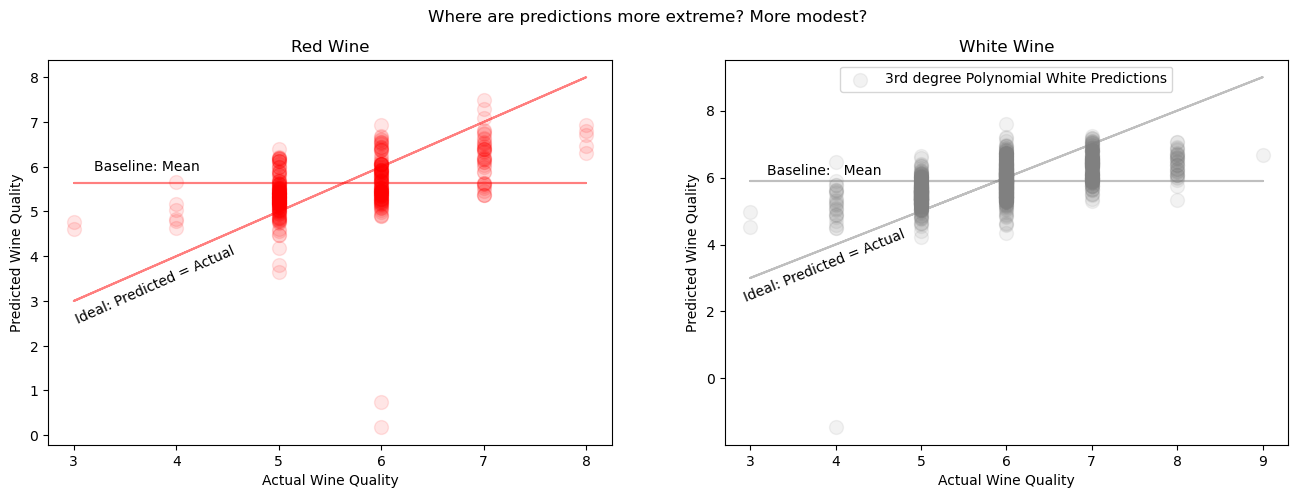

In [48]:
# plot predictions vs actual on test
m.plt_err(Xrs_train,Xws_train,yr_train,yw_train,Xrs_test,Xws_test,yr_test,yw_test)